# Exploratory data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
WORKING_PATH = '/content/drive/MyDrive/KeepCoding/DeepLearning/exercise'

In [ ]:
%cd {WORKING_PATH}

/content/drive/MyDrive/KeepCoding/DeepLearning/exercise


In [ ]:
import sys
sys.path.append(WORKING_PATH)

In [ ]:
!pip install -r requirements.txt

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import preprocessing
from collections import Counter
import cv2
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# to load custom libraries
sys.path.append(WORKING_PATH)

# load custom library
from utilsPlots import *

# load dataset
poi_data = pd.read_csv(os.path.join(WORKING_PATH, "poi_dataset.csv"))

print(f'Number of samples: {poi_data.shape[0]}')
print(f'Number of features: {poi_data.shape[1]}')

Number of samples: 1569
Number of features: 14


In [ ]:
# check data structure
poi_data.head().T

,0,1,2,3,4
id,4b36a3ed-3b28-4bc7-b975-1d48b586db03,e32b3603-a94f-49df-8b31-92445a86377c,0123a69b-13ac-4b65-a5d5-71a95560cff5,390d7d9e-e972-451c-b5e4-f494af15e788,023fc1bf-a1cd-4b9f-af78-48792ab1a294
name,Galería Fran Reus,Convento de San Plácido,Instituto Geológico y Minero de España,Margarita Gil Roësset,Museo del Traje. Centro de Investigación del P...
shortDescription,La Galería Fran Reus es un espacio dedicado a ...,"El Convento de San Plácido en Madrid, fundado ...","El Instituto Geológico y Minero de España, sit...","Margarita Gil Roësset, escultora y poetisa esp...","El Museo del Traje de Madrid, fundado en 2004,..."
categories,"['Escultura', 'Pintura']","['Patrimonio', 'Historia']","['Ciencia', 'Patrimonio']",['Cultura'],"['Patrimonio', 'Cultura']"
tier,1,1,2,1,1
locationLon,2.642262,-3.704467,-3.699694,-3.691228,-3.727822
locationLat,39.572694,40.423037,40.442045,40.427256,40.439665
tags,[],[],[],[],[]
xps,500,500,250,500,500
Visits,10009,10010,10015,10011,10020


In [ ]:
# check NAs
poi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1569 non-null   object 
 1   name              1569 non-null   object 
 2   shortDescription  1569 non-null   object 
 3   categories        1569 non-null   object 
 4   tier              1569 non-null   int64  
 5   locationLon       1569 non-null   float64
 6   locationLat       1569 non-null   float64
 7   tags              1569 non-null   object 
 8   xps               1569 non-null   int64  
 9   Visits            1569 non-null   int64  
 10  Likes             1569 non-null   int64  
 11  Dislikes          1569 non-null   int64  
 12  Bookmarks         1569 non-null   int64  
 13  main_image_path   1569 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 171.7+ KB


## Features related to engagement

In [ ]:
# Select features related to engagement
features = ['Visits', 'Likes', 'Dislikes', 'Likes_Dislikes', 'Bookmarks']
# Build Likes_Dislikes feature
poi_data['Likes_Dislikes'] = poi_data['Likes'] - poi_data['Dislikes']
# Check for NAs
poi_data[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Visits          1569 non-null   int64
 1   Likes           1569 non-null   int64
 2   Dislikes        1569 non-null   int64
 3   Likes_Dislikes  1569 non-null   int64
 4   Bookmarks       1569 non-null   int64
dtypes: int64(5)
memory usage: 61.4 KB


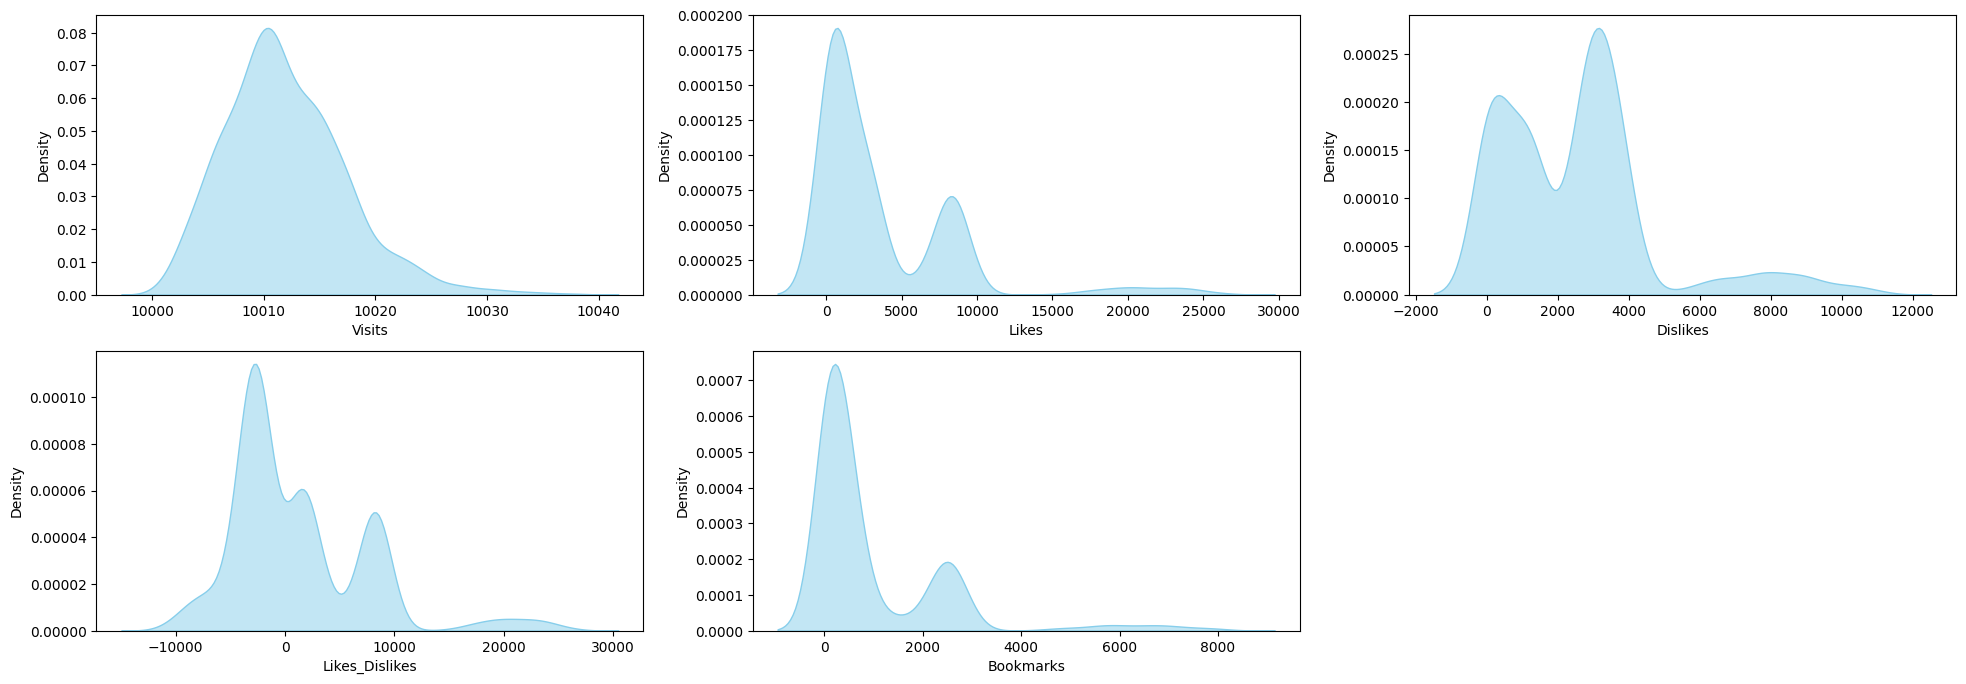

,Visits,Likes,Dislikes,Likes_Dislikes,Bookmarks
count,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000
mean,10011.943276,3623.908222,2526.305927,1097.602294,973.261950
std,5.456808,4817.879374,2225.543360,6303.859532,1453.333948
min,10001.000000,100.000000,52.000000,-10656.000000,50.000000
25%,10008.000000,464.000000,937.000000,-3074.000000,116.000000
50%,10011.000000,1434.000000,2718.000000,-1882.000000,306.000000
75%,10015.000000,6840.000000,3399.000000,3804.000000,1309.000000
max,10038.000000,26425.000000,10999.000000,26161.000000,8157.000000


In [ ]:
# Density plots and statistical summary for features related to engagement
plot_density(poi_data, features, 2, 3)
poi_data[features].describe()

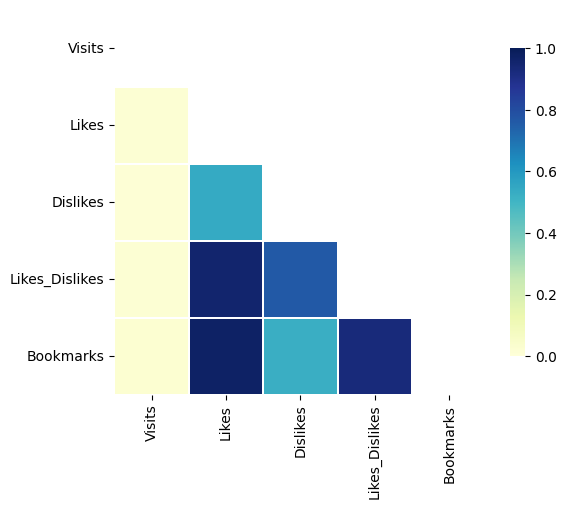

In [ ]:
# Compute the correlation matrix for features related to engagement
corr = np.abs(poi_data[features].corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

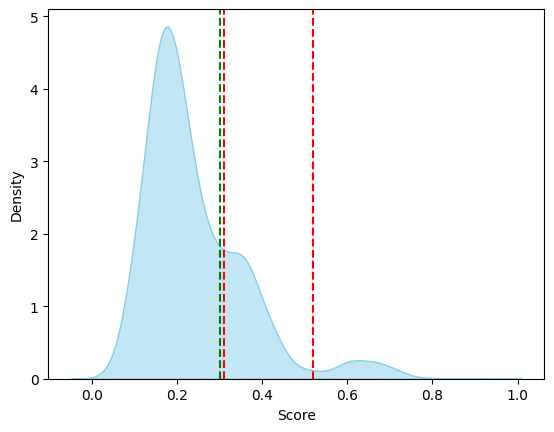

,Score
count,1569.000000
mean,0.242964
std,0.123774
min,0.035659
25%,0.160458
50%,0.207799
75%,0.302267
max,0.924182


In [ ]:
# Considering 'Visits', 'Bookmarks' and 'Likes_Dislikes' features
poi_engagement = poi_data[['Visits','Bookmarks','Likes_Dislikes']]

# range from 0 to 1 each feature
scaler = preprocessing.MinMaxScaler().fit(poi_engagement)
scaled = scaler.transform(poi_engagement)

# calculate score feature
poi_data['Score'] = scaled.sum(axis = 1)/3

# density plot for score feature
# limits for engagements levels are defined (0.31, 0.52)
sns.kdeplot(poi_data['Score'], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Density')
plt.axvline(x=0.30, color='green', linestyle='dashed')
plt.axvline(x=0.31, color='red', linestyle='dashed')
plt.axvline(x=0.52, color='red', linestyle='dashed')
plt.show()
poi_data['Score'].describe()

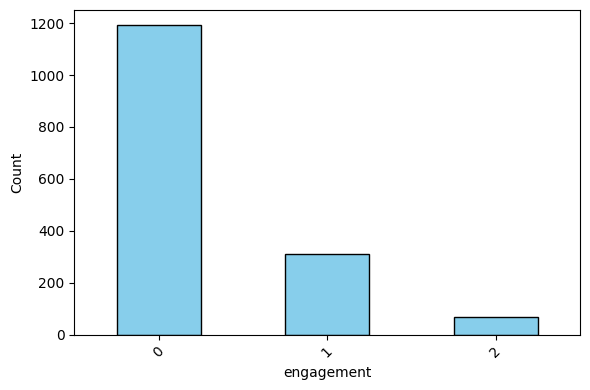

,count
engagement,
0,1191
1,311
2,67


In [ ]:
# Three levels for variable describing engagement using 'Visits', 'Bookmarks' and 'Likes_Dislikes'
def categorize_score(x):
  if x < 0.31:
    return 0
  elif x >= 0.31 and x < 0.52:
    return 1
  elif x > 0.52:
    return 2

poi_data['engagement'] = poi_data['Score'].apply(categorize_score)
plot_bars(poi_data, ['engagement'], 1, 1)
poi_data['engagement'].value_counts()

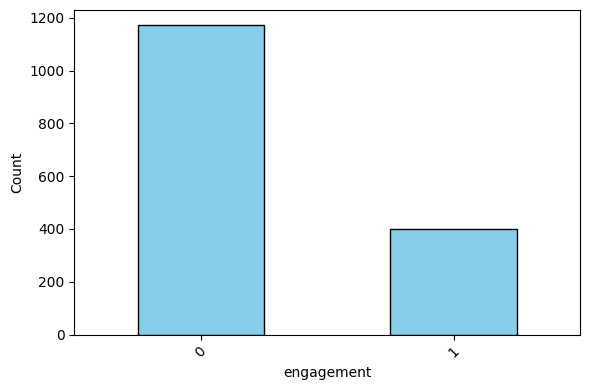

,count
engagement,
0,1171
1,398


In [ ]:
# Two levels for variable describing engagement using 'Visits', 'Bookmarks' and 'Likes_Dislikes'
def categorize_score(x):
  if x < 0.30:
    return 0
  else:
    return 1

poi_data['engagement'] = poi_data['Score'].apply(categorize_score)
plot_bars(poi_data, ['engagement'], 1, 1)
poi_data['engagement'].value_counts()

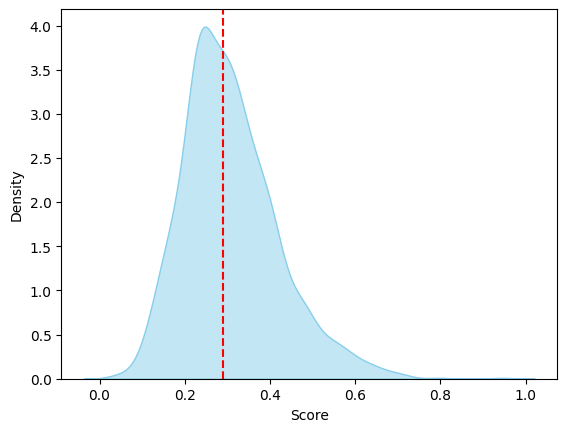

,Score
count,1569.000000
mean,0.307504
std,0.111837
min,0.040105
25%,0.231612
50%,0.293254
75%,0.370732
max,0.944494


In [ ]:
# Only considering 'Visits' and 'Likes_Dislikes' features
poi_engagement = poi_data[['Visits','Likes_Dislikes']]

# range from 0 to 1 each feature
scaler = preprocessing.MinMaxScaler().fit(poi_engagement)
scaled = scaler.transform(poi_engagement)

# calculate score feature
poi_data['Score'] = scaled.sum(axis = 1)/2

# density plot for score feature
sns.kdeplot(poi_data['Score'], fill=True, color='skyblue', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Density')
plt.axvline(x=0.29, color='red', linestyle='dashed')
plt.show()
poi_data['Score'].describe()

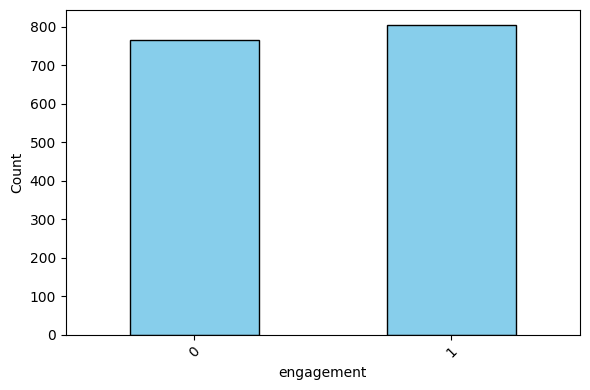

,count
engagement,
1,803
0,766


In [ ]:
# Two levels for variable describing engagement using 'Visits' and 'Likes_Dislikes'
def categorize_score(x):
  if x < 0.29:
    return 0
  else:
    return 1

poi_data['engagement'] = poi_data['Score'].apply(categorize_score)
plot_bars(poi_data, ['engagement'], 1, 1)
poi_data['engagement'].value_counts()

## Images

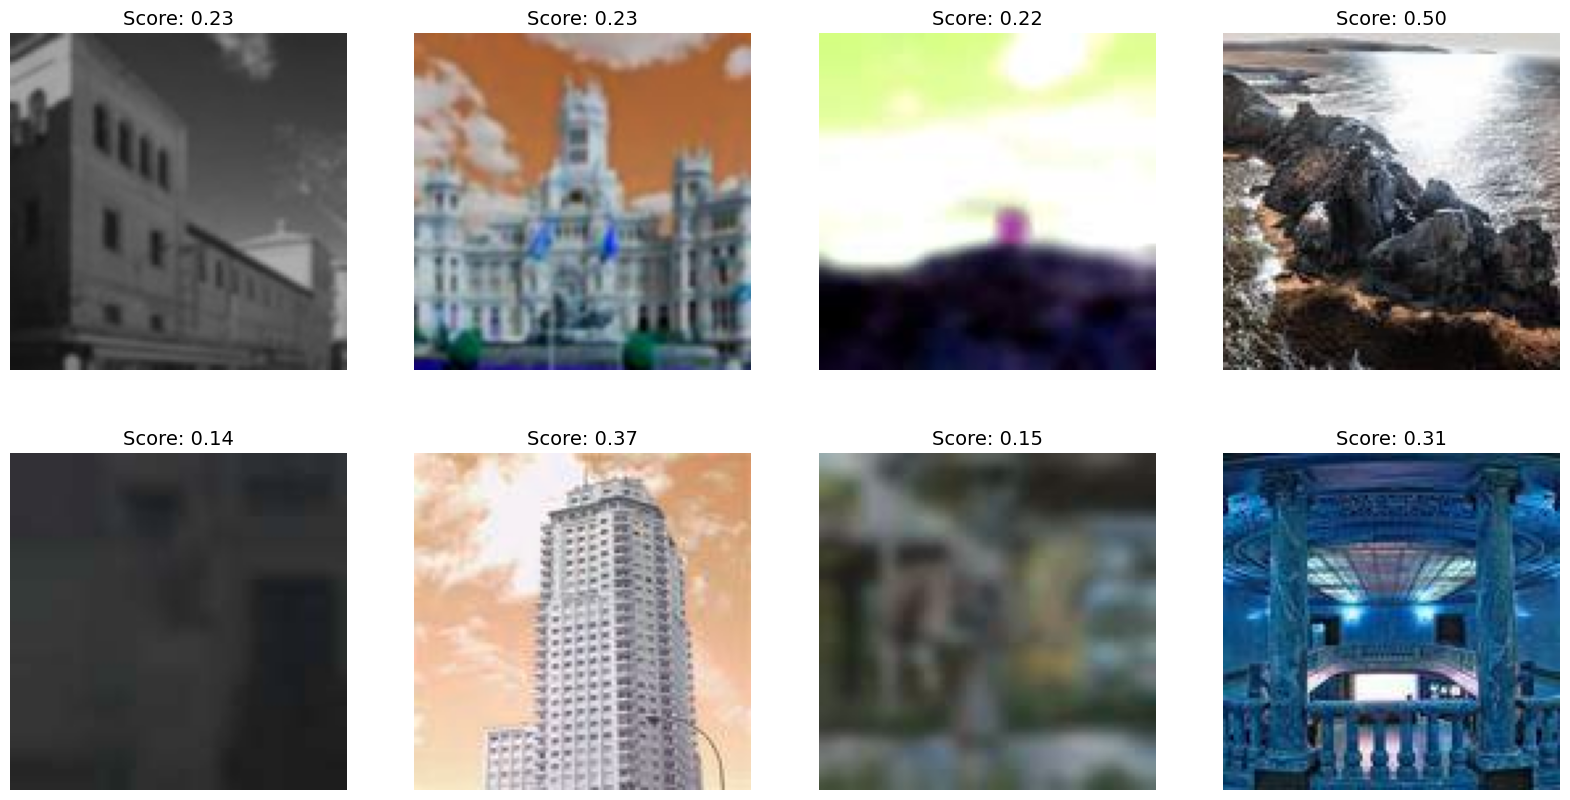

In [ ]:
# plot random images
path_data = "drive/MyDrive/KeepCoding/DeepLearning"

poi_data_random = poi_data.sample(n=8)
poi_data_random.index = list(range(1,9))

plt.figure(figsize=(20,10))
for idx, main_img_path in poi_data_random['main_image_path'].items():
  title = f"Score: {poi_data_random.loc[idx,'Score']:.2f}"
  img_path = os.path.join(WORKING_PATH,main_img_path)
  image = cv2.imread(img_path)
  plt.subplot(2,4,idx)
  plt.title(title, fontsize = 14)
  plt.imshow(image)
  plt.axis('off')
plt.show()

In [ ]:
# read images and calculate sd for each channel
list_sd_images = []
for idx, main_img_path in poi_data['main_image_path'].items():
  img_path = os.path.join(WORKING_PATH,main_img_path)
  image = cv2.imread(img_path)
  list_sd_images.append(np.std(image, axis=(0,1)))
np_sd_images = np.vstack(list_sd_images)

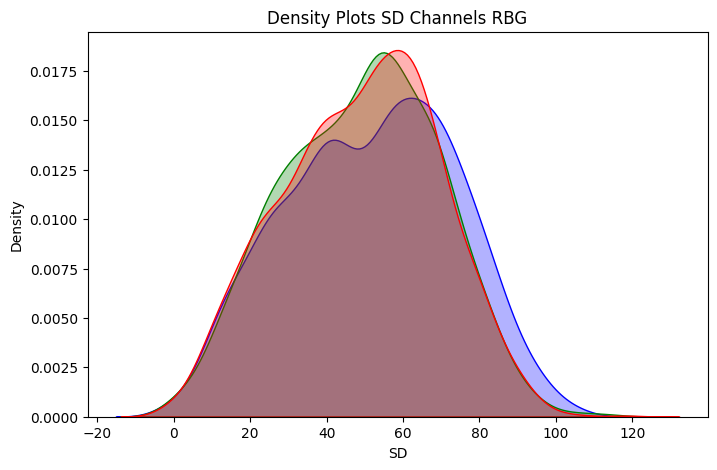

In [ ]:
# for each channel a density plot is show
plt.figure(figsize=(8, 5))

sns.kdeplot(np_sd_images[:, 0], color='blue', fill=True, alpha = 0.3)
sns.kdeplot(np_sd_images[:, 1], color='green', fill=True, alpha = 0.3)
sns.kdeplot(np_sd_images[:, 2], color='red', fill=True, alpha = 0.3)
plt.title("Density Plots SD Channels RBG")
plt.xlabel('SD')
plt.ylabel('Density')

plt.show()

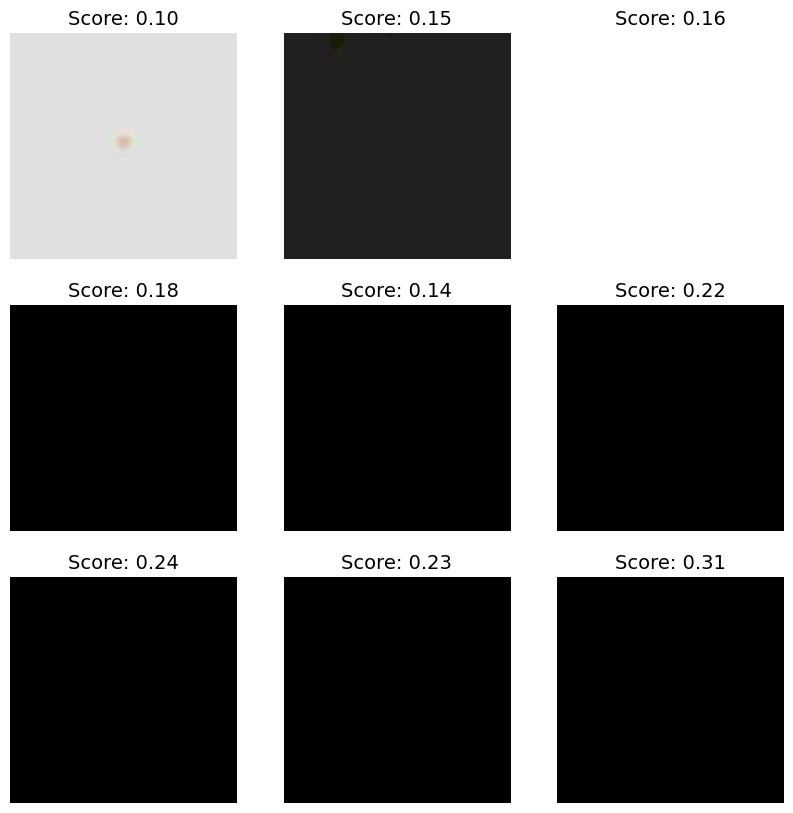

In [ ]:
# To check for 'NA' in image, a cut-off is used for SD (< 1)
idx_image_selection = np.where(np.any(np_sd_images < 1, axis = 1))[0]

poi_data_selection = poi_data.iloc[idx_image_selection]
poi_data_selection.index = list(range(1,len(idx_image_selection)+1))

plt.figure(figsize=(10,10))
for idx, main_img_path in poi_data_selection['main_image_path'].items():
  title = f"Score: {poi_data_selection.loc[idx,'Score']:.2f}"
  img_path = os.path.join(WORKING_PATH, main_img_path)
  image = cv2.imread(img_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.subplot(3,3,idx)
  plt.title(title, fontsize = 14)
  plt.imshow(image)
  plt.axis('off')
plt.show()

## Feature shortDescription

shortDescription: ¡Admira vistas impresionantes en Miradoiro do Monte Tremuzo! Naturaleza y mar se unen en un espectáculo visual único.
shortDescription: La Catedral de la Almudena, ícono del Madrid palaciego, fusiona estilos arquitectónicos en un templo que tardó más de un siglo en completarse.
shortDescription: Contempla el Sagrado Corazón de Jesús, símbolo de fe y dedicación en un entorno de paz y reflexión.
shortDescription: Visita el Monumento a Severo Ochoa, un homenaje al Nobel que inspira generaciones en la Universidad Complutense de Madrid.
shortDescription: ¡Explora la huella de Velázquez en Madrid! Descubre monumentos que celebran su legado artístico e histórico en la ciudad.


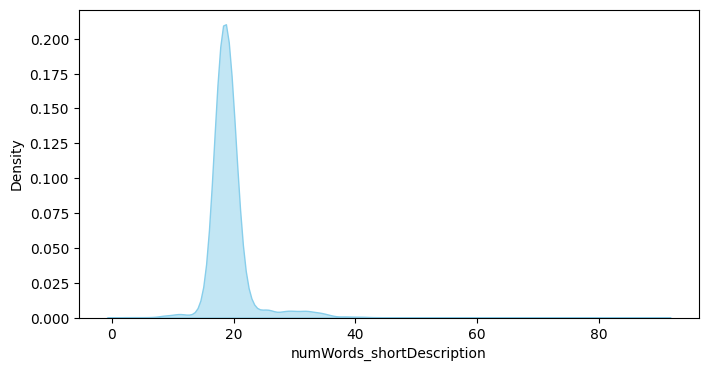

,numWords_shortDescription
count,1569.000000
mean,19.316125
std,4.087781
min,2.000000
25%,18.000000
50%,19.000000
75%,20.000000
max,89.000000


In [ ]:
# analysis for shortDescription feature
poi_data_random = poi_data.sample(n=5)
for _, shortDescription in poi_data_random['shortDescription'].items():
  print(f'shortDescription: {shortDescription}')

poi_data['numWords_shortDescription'] = poi_data['shortDescription'].apply(lambda x: len(x.split()))
plot_density(poi_data, ['numWords_shortDescription'], 1, 1)
poi_data['numWords_shortDescription'].describe()

## Feature categories

Number of unique categories: 12
Unique categories: {'Historia', 'Arquitectura', 'Misterio', 'Ciencia', 'Patrimonio', 'Escultura', 'Pintura', 'Cultura', 'Naturaleza', 'Cine', 'Gastronomía', 'Ocio'}
Some random categories features from data:
categories: ['Cultura', 'Historia', 'Arquitectura']
categories: ['Arquitectura', 'Cultura', 'Escultura']
categories: ['Escultura', 'Historia', 'Cultura']
categories: ['Cultura']
categories: ['Patrimonio', 'Arquitectura', 'Historia']


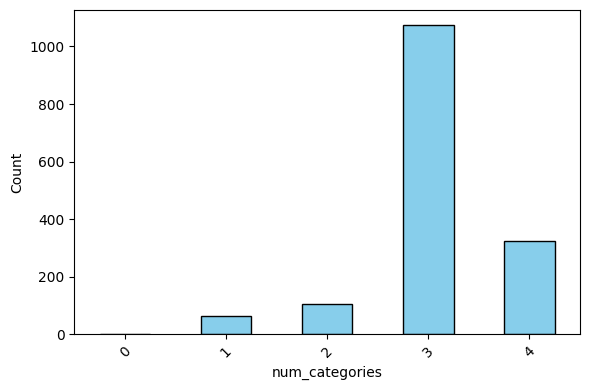

,count
num_categories,
3,1073
4,325
2,106
1,63
0,2


In [ ]:
# Transform string to list of strings
poi_data['list_categories'] = poi_data['categories'].apply(eval)

# Unique categories
categories = set(cat for cats in poi_data['list_categories'] for cat in cats)
print(f'Number of unique categories: {len(categories)}')
print(f'Unique categories: {categories}')

# Randomly selection for categories
poi_data_random = poi_data.sample(n=5)
poi_data_random.index = list(range(1,6))
print('Some random categories features from data:')
for idx, categories_sample in poi_data_random['list_categories'].items():
  print(f'categories: {categories_sample}')

# Distribution for number of categories
poi_data['num_categories'] = poi_data['list_categories'].apply(len)
plot_bars(poi_data, ['num_categories'], 1, 1)
poi_data['num_categories'].value_counts()

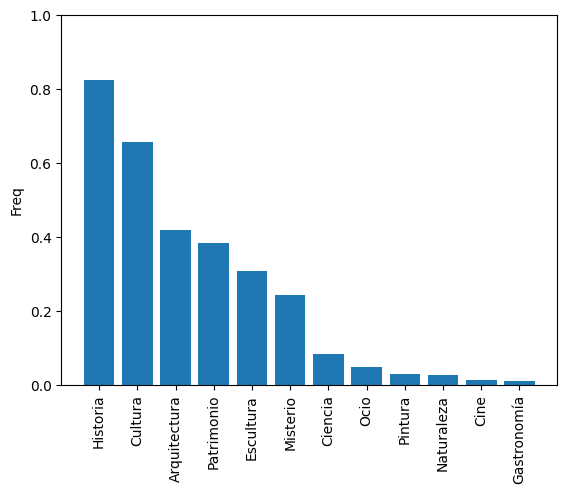

In [ ]:
# Frequencies for categories. Most common category is 'Historia' and least common category is 'Gastronomía'
counts = Counter(list(cat for cats in poi_data["list_categories"] for cat in cats))
sorted_items = [item for item, count in counts.most_common()]
sorted_counts = [count for item, count in counts.most_common()]
sorted_freq = list(map(lambda x: x/poi_data.shape[0], sorted_counts))

plt.bar(sorted_items, sorted_freq)
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.ylabel("Freq")
plt.show()

## Feature tags

Number of unique tags: 2935
Some random tags features from data:
tags: ['OVNIs', 'Iglesias', 'Espacio aéreo', 'Avistamientos']
tags: ['Madrid', 'Plaza', 'Estatua', 'Arte', 'Identidad', 'Historia', 'Cultura', 'Escultura', 'Monumento', 'Chamartin', 'Punto de encuentro', 'Ciudad jardin', 'Símbolo']
tags: ['Puente de vallecas', 'Rock', 'Música', 'Subcultura', 'San diego', 'Estatua', 'Diversidad cultural', 'Monumento', 'Homenaje', 'Vallecas', 'Comunidad', 'Controversia', 'Cultura popular']
tags: ['Madrid', 'Arte', 'Estatua', 'El viso', 'San isidro', 'Historia', 'Cultura', 'Tradición', 'Arquitectura', 'Escultura', 'Chamartin', 'Exposición', 'Patrimonio']
tags: ['Turismo', 'Galicia', 'Biodiversidad', 'Paisaje', 'Cortegada', 'Sálvora', 'Esculturas naturales', 'Bosque de laurel', 'Naturaleza', 'Islas']


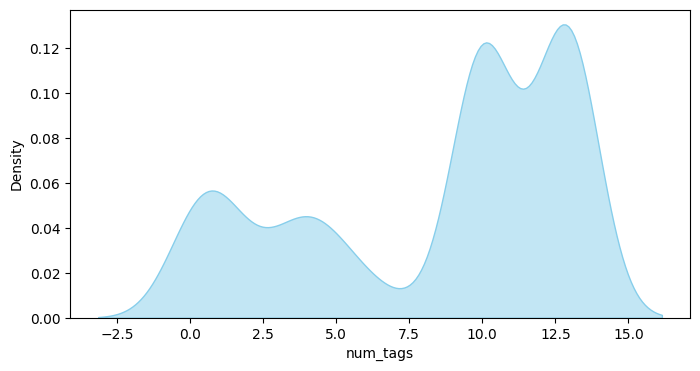

,num_tags
count,1569.000000
mean,8.483110
std,4.567507
min,0.000000
25%,4.000000
50%,10.000000
75%,13.000000
max,13.000000


In [ ]:
# Number of unique tags
poi_data['list_tags'] = poi_data['tags'].apply(eval)
tags = set(tag for tags in poi_data['list_tags'] for tag in tags)
print(f'Number of unique tags: {len(tags)}')

# Randomly selection for tags
poi_data_random = poi_data.sample(n=5)
poi_data_random.index = list(range(1,6))
print('Some random tags features from data:')
for idx, tags in poi_data_random['tags'].items():
  print(f'tags: {tags}')

# Distribution number of tags each sample
poi_data['num_tags'] = poi_data['list_tags'].apply(len)
plot_density(poi_data, ['num_tags'], 1, 1)
poi_data['num_tags'].describe()

## Feature tier

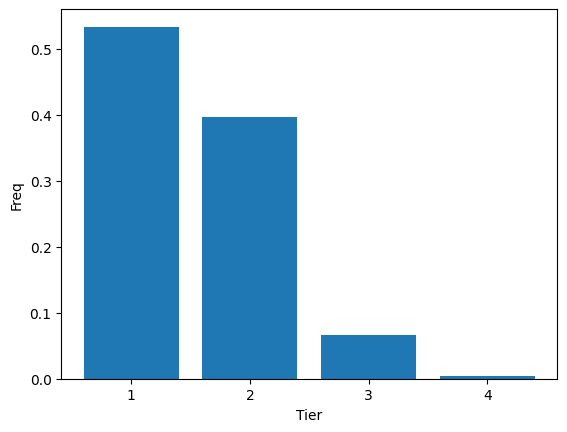

In [ ]:
# how tier is distributed
tier_freq = list(poi_data['tier'].value_counts().apply(lambda x: x/poi_data.shape[0]))
tier = [str(item) for item in list(poi_data['tier'].value_counts().index)]

plt.bar(tier, tier_freq)
plt.xlabel('Tier')
plt.ylabel('Freq')
plt.show()

## Quantitative features

Features locationLon, locationLat, xps

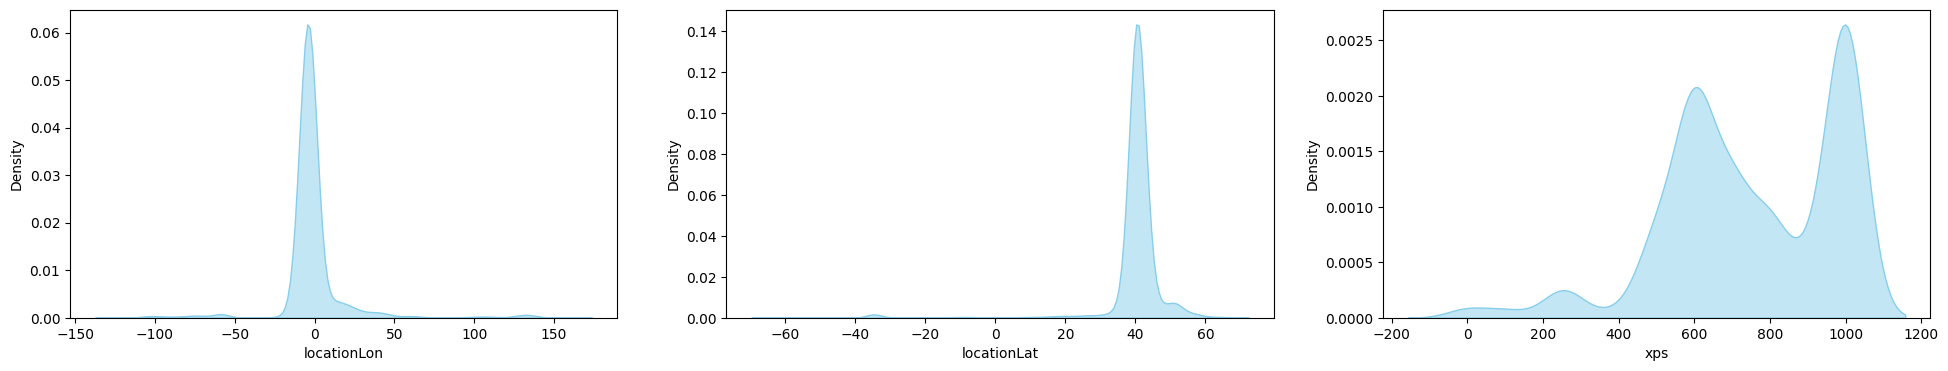

,locationLon,locationLat,xps
count,1569.000000,1569.000000,1569.000000
mean,-1.132337,39.900141,750.382409
std,22.733401,9.662134,228.319854
min,-121.951049,-62.940930,0.000000
25%,-3.725292,40.411754,600.000000
50%,-3.699140,40.421738,700.000000
75%,-3.673348,40.472458,1000.000000
max,158.333118,65.706572,1000.000000


In [ ]:
# density plots for quantitative features
plot_density(poi_data, ['locationLon','locationLat','xps'], 1, 3)
poi_data[['locationLon','locationLat','xps']].describe()